# Problem 5: Implementing K-Means Clustering on the Iris Dataset

For this project I implemented and applied the K-means clustering algorithm to the Iris dataset.


In [3]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset from a CSV file
data = pd.read_csv("irisdata.csv")
X = data.iloc[:, :-1].values  # Assuming the last column is the label and others are features



## Part (a): Implementing the K-Means Clustering Algorithm

 For this section I implemented the k-means algorithm, which assigns data points to clusters and iteratively updates cluster centroids to minimize the sum of squared distances. We define functions to initialize centroids, assign clusters, update centroids, and execute the k-means process.


In [5]:
def initialize_centroids(X, K):
    """Randomly initialize centroids from the data points."""
    return X[np.random.choice(X.shape[0], K, replace=False)]

def assign_clusters(X, centroids):
    """Assign each data point to the closest centroid."""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, K):
    """Calculate new centroids as the mean of assigned points."""
    centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
    return centroids

def kmeans(X, K, max_iters=100):
    """K-means clustering algorithm."""
    centroids = initialize_centroids(X, K)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, K)
        # Check for convergence (if centroids don't change)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels


## Part (b): Applying K-Means to the Iris Dataset and Plotting the Objective Function

Here, we apply the K-means algorithm to the Iris dataset for \( K = 2 \) and \( K = 3 \) clusters. We track the objective function (sum of squared distances to cluster centers) across iterations to visualize the learning curve for each \( K \)-value.


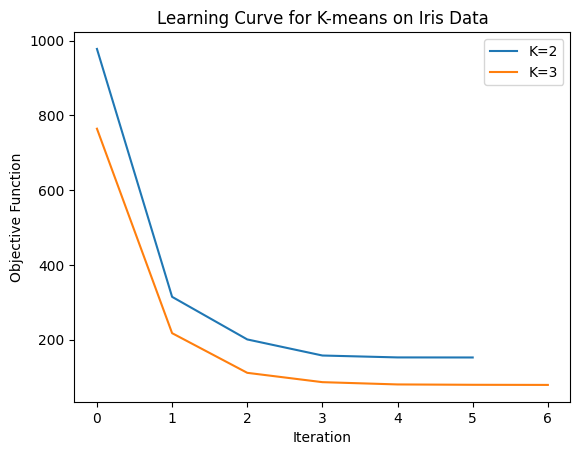

In [6]:
def kmeans_with_objective(X, K, max_iters=100):
    centroids = initialize_centroids(X, K)
    objective_values = []
    
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, K)
        
        # Calculate objective function
        objective = np.sum((X - centroids[labels]) ** 2)
        objective_values.append(objective)
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, objective_values

# Apply k-means with K=2 and K=3 and plot learning curves
for K in [2, 3]:
    _, _, objective_values = kmeans_with_objective(X, K)
    plt.plot(objective_values, label=f'K={K}')
    
plt.xlabel("Iteration")
plt.ylabel("Objective Function")
plt.title("Learning Curve for K-means on Iris Data")
plt.legend()
plt.show()


## Part (c): Visualizing Cluster Centers in 2D (Petal Length and Width)

In this section, I plotted the data points and the final cluster centers using only petal length and width dimensions. This visualization shows how clusters form and how the algorithm converges to stable centroids.


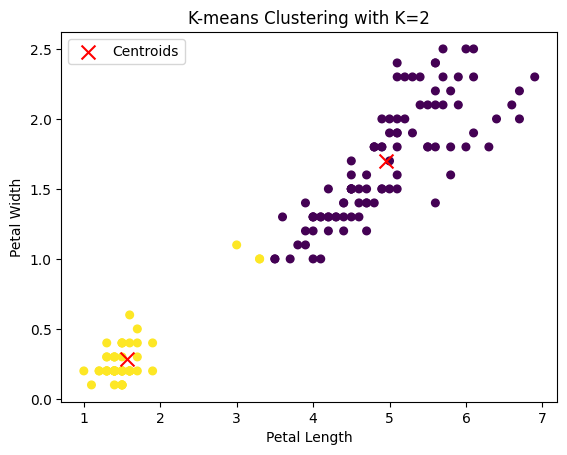

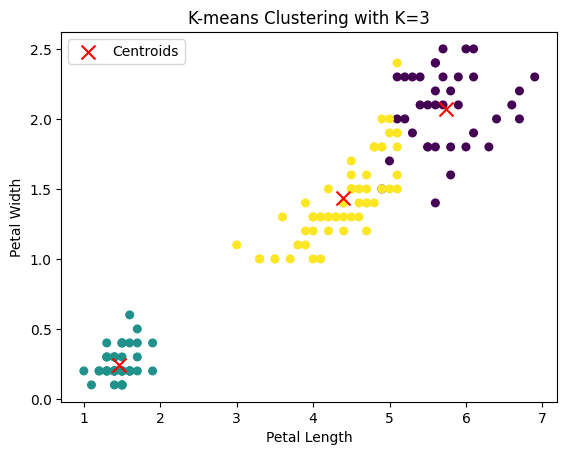

In [7]:
def plot_clusters(X, labels, centroids, K):
    plt.scatter(X[:, 2], X[:, 3], c=labels, cmap='viridis', s=30)
    plt.scatter(centroids[:, 2], centroids[:, 3], c='red', s=100, marker='x', label="Centroids")
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.title(f"K-means Clustering with K={K}")
    plt.legend()
    plt.show()

for K in [2, 3]:
    centroids, labels = kmeans(X, K)
    plot_clusters(X, labels, centroids, K)


## Part (d): Plotting Decision Boundaries for K-Means Clustering

Lastly, I visualized the decision boundaries for each cluster for \( K = 2 \) and \( K = 3 \). Decision boundaries separate the regions of influence of each centroid, showing the final clusters for petal length and width.

My approach for this was to create a grid of points across the plot area and assign each point to the nearest cluster center to form regions representing each cluster. I then plotted these regions as colored decision boundaries, overlaying the data points and cluster centers to visually show how the clusters separate the data.



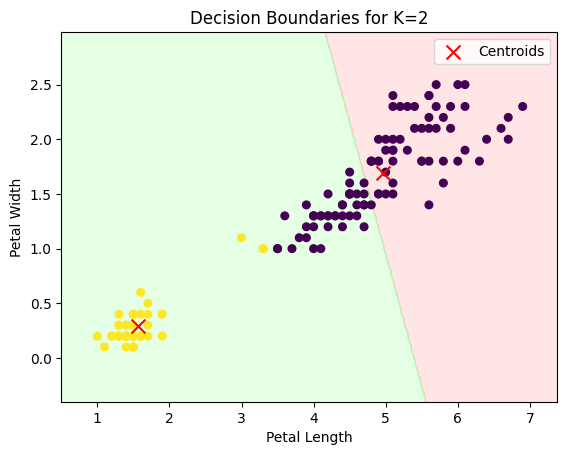

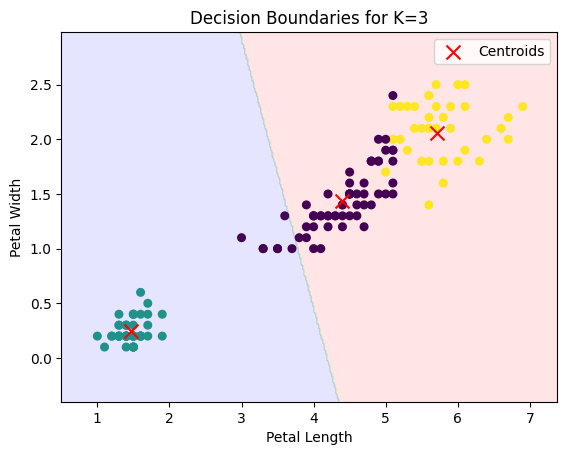

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, labels, centroids, K):
    x_min, x_max = X[:, 2].min() - 0.5, X[:, 2].max() + 0.5
    y_min, y_max = X[:, 3].min() - 0.5, X[:, 3].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = assign_clusters(np.c_[np.zeros(len(xx.ravel())), np.zeros(len(xx.ravel())), xx.ravel(), yy.ravel()], centroids)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'][:K]))
    plt.scatter(X[:, 2], X[:, 3], c=labels, cmap='viridis', s=30)
    plt.scatter(centroids[:, 2], centroids[:, 3], c='red', s=100, marker='x', label="Centroids")
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.title(f"Decision Boundaries for K={K}")
    plt.legend()
    plt.show()

for K in [2, 3]:
    centroids, labels = kmeans(X, K)
    plot_decision_boundaries(X, labels, centroids, K)

